In [117]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from calendar import monthrange

In [2]:
comp_ticket = 'HDFCBANK.NS'
HDFC_data = yf.download(comp_ticket,period = 'max')
df = pd.DataFrame(HDFC_data)
# df.index = df.index.strftime('%Y-%m-%d')
df['Year_Month'] = df.index.to_period('M')
df['Year'] = df.index.to_period('Y')
df['Month'] = df.index.month
df['Day'] = df.index.day
display(df.tail())
display(df.info())

[*********************100%%**********************]  1 of 1 completed

,Open,High,Low,Close,Adj Close,Volume,Year_Month,Year,Month,Day
Date,,,,,,,,,,
2024-06-28,1697.599976,1706.599976,1679.000000,1683.800049,1683.800049,13238023,2024-06,2024,6,28
2024-07-01,1680.000000,1707.300049,1680.000000,1705.199951,1705.199951,10593512,2024-07,2024,7,1
2024-07-02,1715.000000,1734.900024,1702.750000,1730.599976,1730.599976,22960845,2024-07,2024,7,2
2024-07-03,1791.000000,1794.000000,1764.650024,1768.650024,1768.650024,61608901,2024-07,2024,7,3
2024-07-04,1759.750000,1759.750000,1724.849976,1727.150024,1727.150024,22919975,2024-07,2024,7,4


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7162 entries, 1996-01-01 to 2024-07-04
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype        
---  ------      --------------  -----        
 0   Open        7162 non-null   float64      
 1   High        7162 non-null   float64      
 2   Low         7162 non-null   float64      
 3   Close       7162 non-null   float64      
 4   Adj Close   7162 non-null   float64      
 5   Volume      7162 non-null   int64        
 6   Year_Month  7162 non-null   period[M]    
 7   Year        7162 non-null   period[A-DEC]
 8   Month       7162 non-null   int32        
 9   Day         7162 non-null   int32        
dtypes: float64(5), int32(2), int64(1), period[A-DEC](1), period[M](1)
memory usage: 559.5 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7162 entries, 1996-01-01 to 2024-07-04
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype        
---  ------      --------------  -----       

None

In [137]:
def week_number(day):
    if day <= 7:
        return 'w1'
    elif day <= 14:
        return 'w2'
    elif day <= 21:
        return 'w3'
    elif day <= 28:
        return 'w4'
    else:
        return 'w5'

<Figure size 2000x500 with 0 Axes>

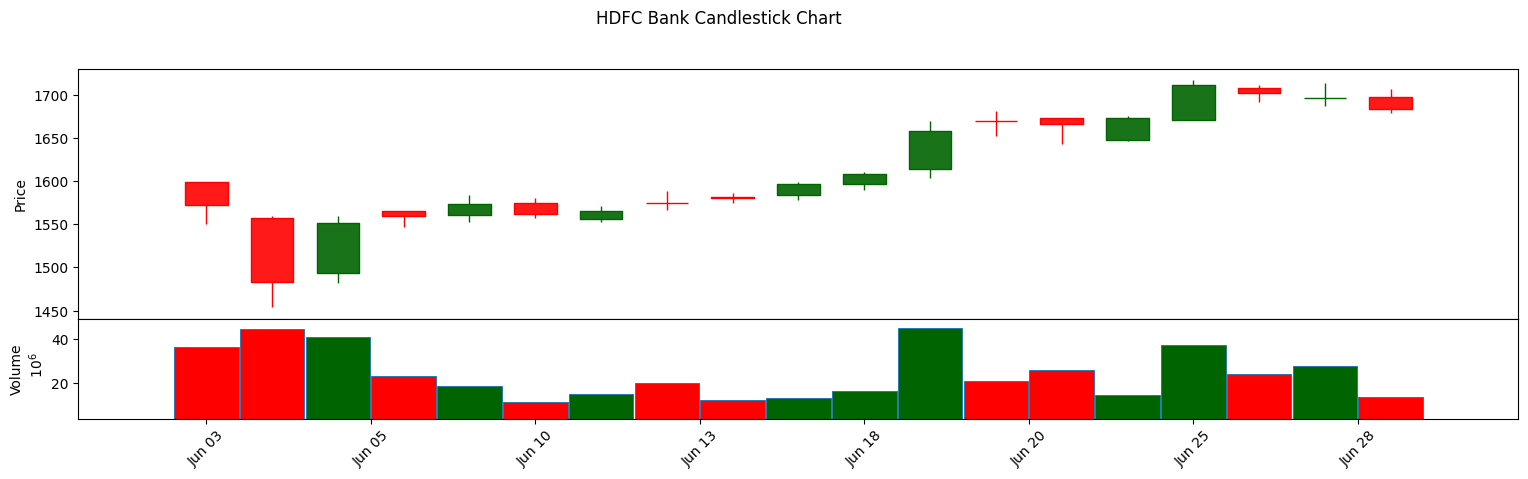

In [153]:
import mplfinance as mpf
plt.figure(figsize=(20,5))
mc = mpf.make_marketcolors(
    up='darkgreen', down='red', 
    edge='inherit', wick='inherit', volume='inherit'
)
s = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(df[df.index.isin(pd.date_range('2024-06-01','2024-06-30'))], type='candle', volume=True,style = s, title='HDFC Bank Candlestick Chart', ylabel='Price', ylabel_lower='Volume',figsize=(20,5))


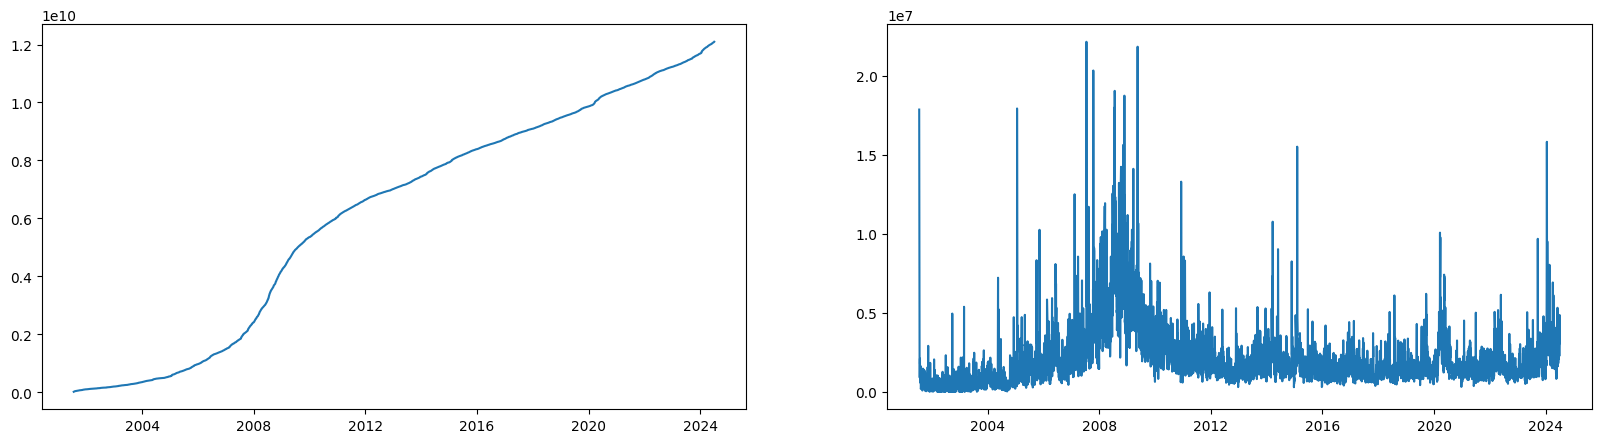

In [78]:
fig,ax = plt.subplots(1,2,figsize = (20,5))
ax[0].plot(df.Volume.cumsum())
ax[1].plot(df.Volume)
plt.show()

### **Max volume**

<Figure size 2000x500 with 0 Axes>

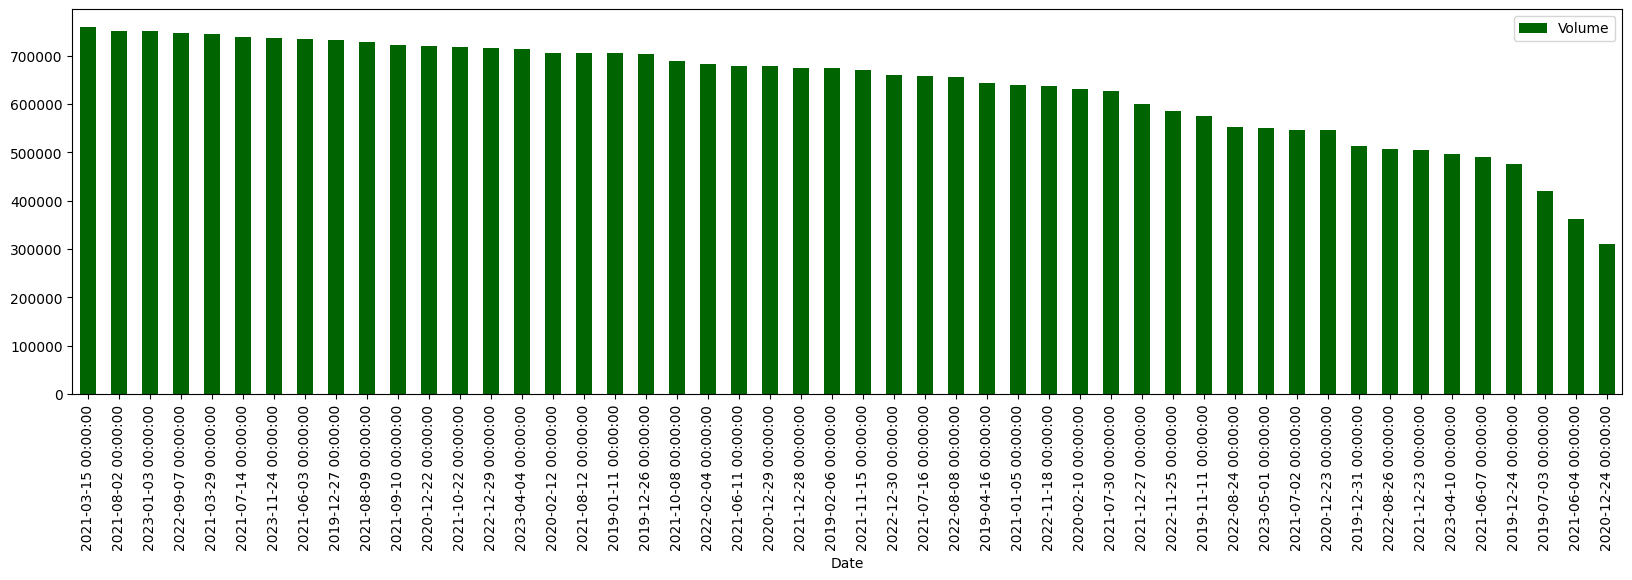

In [144]:
plt.figure(figsize = (20,5))
filtered_df = df[df.index.isin(pd.date_range('2019-01-01','2024-07-03'))][['Volume']].sort_values(by = 'Volume',ascending=False).tail(50)
filtered_df.plot(kind = 'bar',figsize = (20,5),color = 'darkgreen')
plt.show()

### **Last 50 Days and Last 9 years Volume Distribution**

,Volume
Date,
2024-06-27,3588100
2024-06-28,3539100
2024-07-01,3049500
2024-07-02,4858900
2024-07-03,2314900


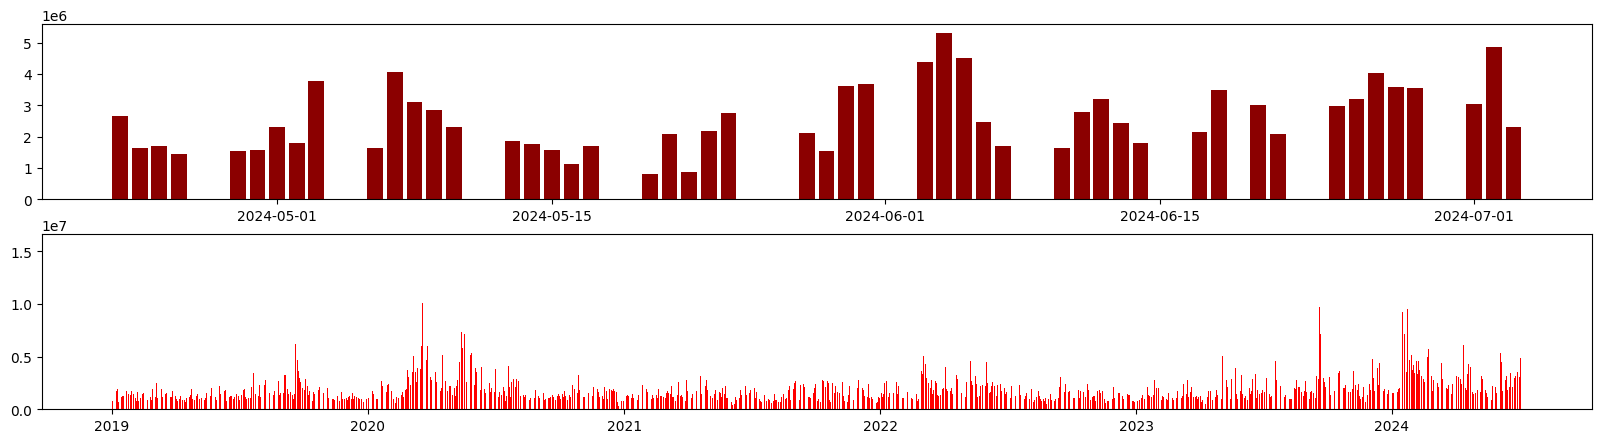

In [145]:
fig,ax = plt.subplots(2,1,figsize = (20,5))
filtered_df_50 = df[df.index.isin(pd.date_range('2019-01-01','2024-07-03'))][['Volume']].tail(50)
filtered_df = df[df.index.isin(pd.date_range('2019-01-01','2024-07-03'))][['Volume']]
ax[0].bar(filtered_df_50.index,height = filtered_df_50.Volume,color = 'darkred')
ax[1].bar(filtered_df.index,height = filtered_df.Volume,color = 'red')
display(filtered_df.tail())
plt.show()

### **Yearly Distribution(Volume)**

In [158]:
fil_df = df[df.index.isin(pd.date_range('2019-01-01','2024-07-03'))][['Volume','Year','Year_Month','Month','Day']]
# fil_df[['Year','Year_Month','Month','Day']] = fil_df[['Year','Year_Month','Month','Day']].astype(str)
yr_df = fil_df.groupby('Year')['Volume'].sum().to_frame().reset_index()
ym_df = fil_df.groupby('Year_Month')['Volume'].sum().to_frame().reset_index()
mon_df = fil_df.groupby('Month')['Volume'].mean().to_frame().reset_index()
day_df = fil_df.groupby('Day')['Volume'].mean().to_frame().reset_index().sort_values(by = 'Day')

<AxesSubplot: xlabel='Day', ylabel='Volume'>

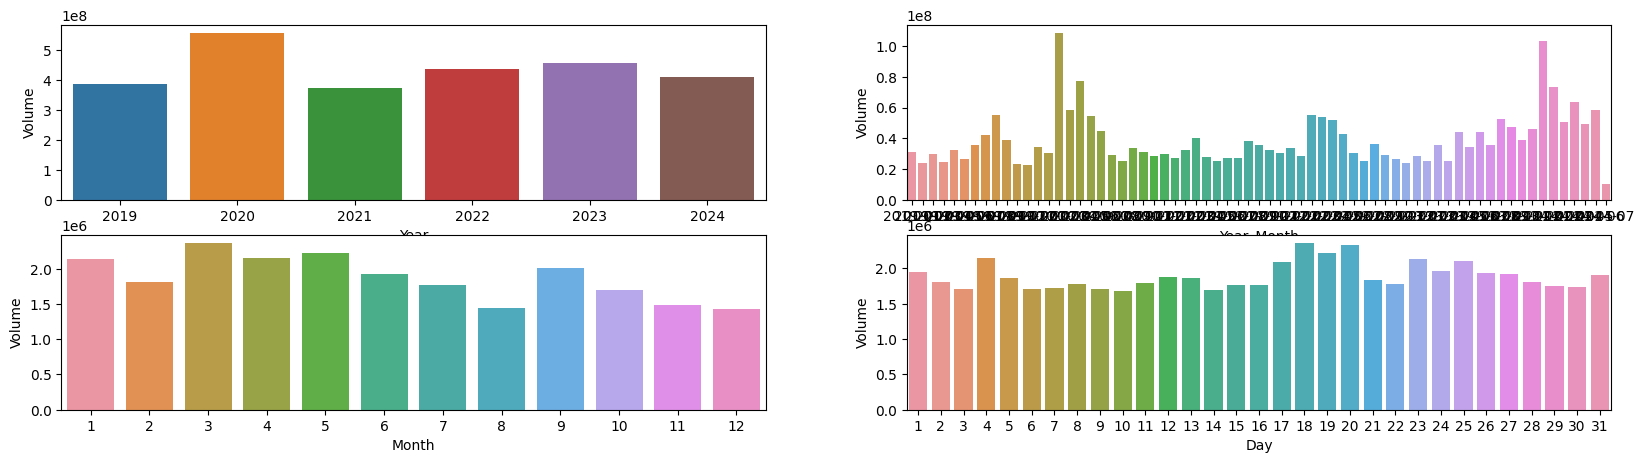

In [159]:
fig,ax = plt.subplots(2,2,figsize = (20,5))
sns.barplot(x = yr_df.Year,y = yr_df.Volume,ax = ax[0][0])
sns.barplot(x = ym_df.Year_Month,y = ym_df.Volume,ax = ax[0][1])
sns.barplot(x = mon_df.Month,y = mon_df.Volume,ax = ax[1][0])
sns.barplot(x = day_df.Day,y = day_df.Volume,ax = ax[1][1])

### **Adj. Closing Price Distribution**

,Adj Close
Date,
2024-06-28,1683.800049
2024-07-01,1705.199951
2024-07-02,1730.599976
2024-07-03,1768.650024
2024-07-04,1727.150024


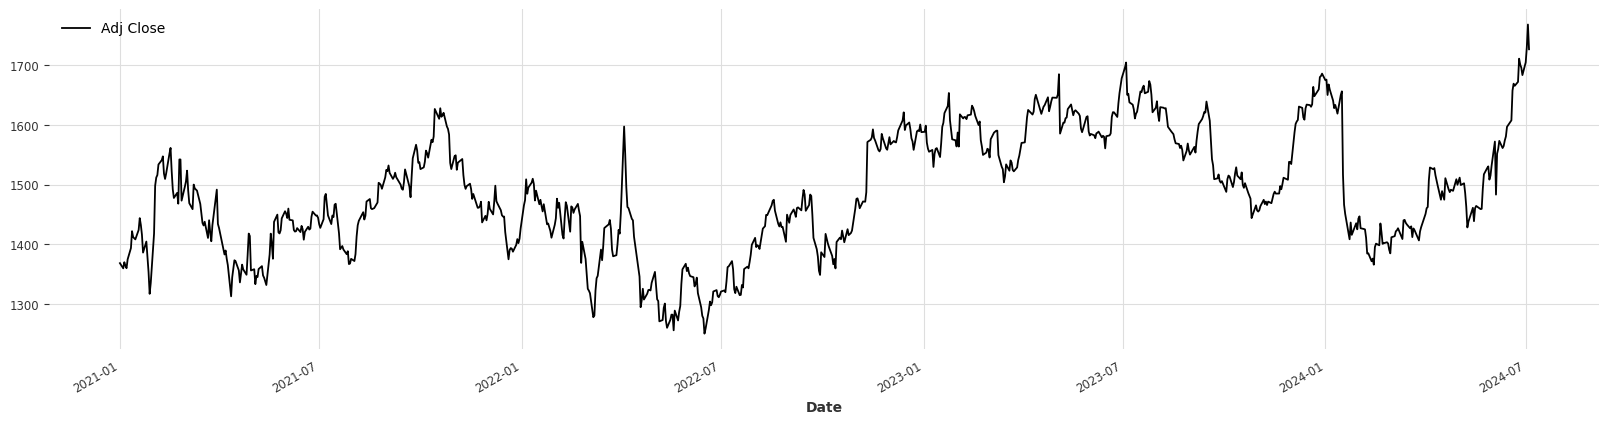

In [51]:
cl_data  = df[df.index.isin(pd.date_range('2021-01-01','2024-07-04'))][['Adj Close']]
cl_data.plot(figsize = (20,5))
display(cl_data.tail())
plt.show()

In [98]:
cl_df = pd.date_range('2021-01-01','2024-07-04').to_frame().merge(cl_data,right_index=True,left_index=True,how = 'left').drop(0,axis = 1).ffill()
cl_df['Adj Close'] = cl_df['Adj Close'].astype('float32')
# cl_df = cl_df.reset_index().rename(columns = {'index':'ds','Adj Close':'y'})
cl_df.tail()

,Adj Close
2024-06-30,1683.800049
2024-07-01,1705.199951
2024-07-02,1730.599976
2024-07-03,1768.650024
2024-07-04,1727.150024


### **Forecasting Models**

##### ***1.TCN Model***

In [88]:
from darts.models import TCNModel,Theta
from darts.timeseries import TimeSeries

In [71]:
tr_se,ts_se = TimeSeries.from_dataframe(cl_df).split_before(split_point=pd.to_datetime('2024-01-01'))
model = TCNModel(
    input_chunk_length=45,
    output_chunk_length=30,
    kernel_size=3,
    num_filters=10,
    dropout=0.3,
    weight_norm=True,
    dilation_base=2,
    n_epochs=50,
    batch_size=32,
    optimizer_kwargs={'lr': 1e-3},
    random_state=4620327,
)
model.fit(tr_se,verbose=0)


/Users/prithwijitghosh/Library/Python/3.9/lib/python/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


TCNModel(output_chunk_shift=0, kernel_size=3, num_filters=10, num_layers=None, dilation_base=2, weight_norm=True, dropout=0.3, input_chunk_length=45, output_chunk_length=30, n_epochs=50, batch_size=32, optimizer_kwargs={'lr': 0.001}, random_state=4620327)

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting:   0%|          | 0/1 [00:00<?, ?it/s]

Predicting DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 47.73it/s]

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 46.26it/s]

<AxesSubplot: xlabel='time'>

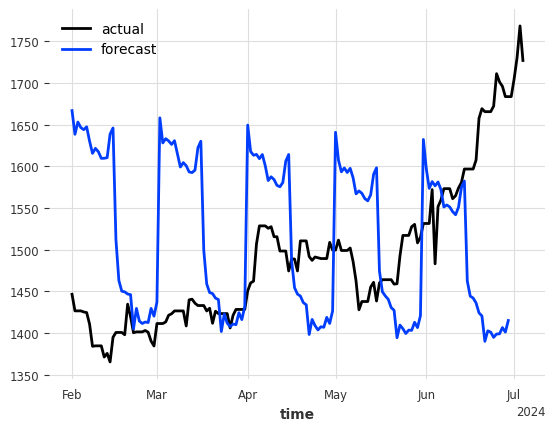

In [73]:
predict = model.predict(n = 150,series=tr_se)
ts_se.plot(label='actual')
predict.plot(label = 'forecast')

#### ***2. Prophet***

In [86]:
from prophet import Prophet
train,test = cl_df[cl_df.ds<'2021-01-01'],cl_df[cl_df.ds>='2021-01-01']
model = Prophet().fit(cl_df)

06:02:08 - cmdstanpy - INFO - Chain [1] start processing


06:02:08 - cmdstanpy - INFO - Chain [1] done processing


In [87]:
future = model.make_future_dataframe(periods = 30)
model.predict(future).tail(30)[['yhat']]

,yhat
1281,1620.457260
1282,1620.447377
1283,1620.048785
1284,1620.585101
1285,1621.993376
1286,1619.323368
1287,1616.319810
1288,1614.636336
1289,1612.916559
1290,1611.163178


#### ***3.Theta***

<AxesSubplot: xlabel='time'>

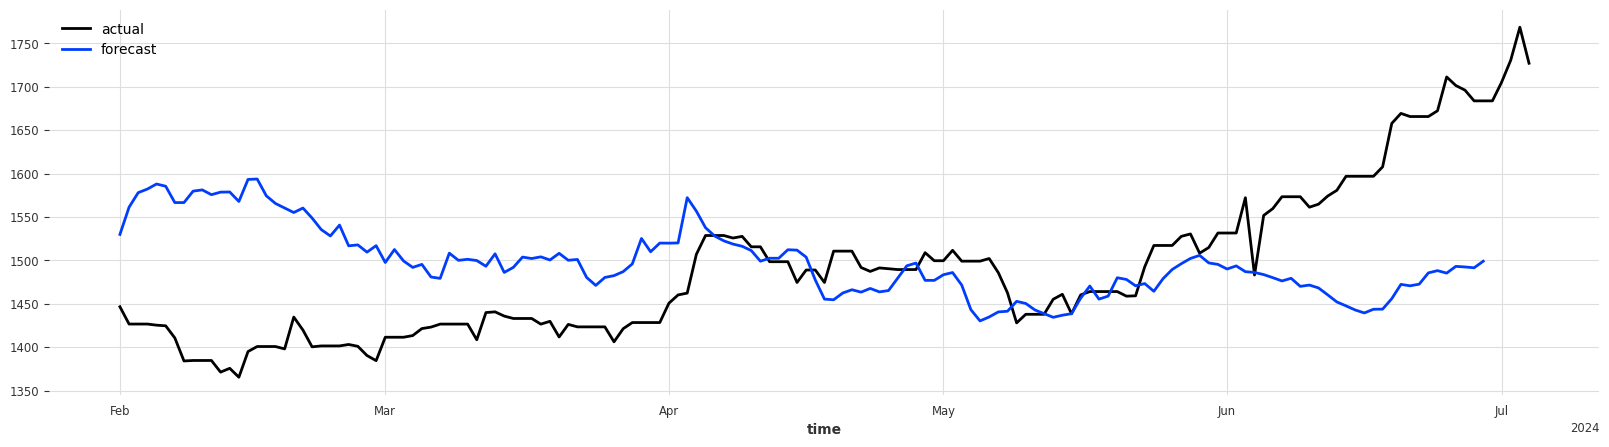

In [114]:
plt.figure(figsize=(20,5))
tr_se,ts_se = TimeSeries.from_dataframe(cl_df).split_before(split_point=pd.to_datetime('2024-01-01'))
model = Theta(theta = 0.5,seasonality_period = 365)
model.fit(tr_se)
predict = model.predict(n = 150)
ts_se.plot(label = 'actual')
predict.plot(label = 'forecast')

In [129]:
year = 2024
# month = 1
last_month_eval = []
for month in range(1,7):
    noofdays = monthrange(year,month)[1]
    tr_se,ts_se = TimeSeries.from_dataframe(cl_df).split_before(split_point=pd.to_datetime(f'{year}-0{month}-01'))
    model.fit(tr_se)
    last_month_eval.append(model.predict(n = noofdays).pd_dataframe())
eval_df = pd.concat(last_month_eval,axis = 0)

In [142]:
ev_df = cl_df.merge(eval_df,left_index=True,right_index=True,how = 'right',suffixes=['__actual','__forecast'])
ev_df['Month'] = ev_df.index.month
ev_df['Day'] = ev_df.index.day
ev_df['Week'] = ev_df.Day.apply(week_number)
ev_df['Mon_Week'] = ev_df['Month'].astype(str)+'__'+ev_df['Week']
ev_df.head(50)

,Adj Close__actual,Adj Close__forecast,Month,Day,Week,Mon_Week
time,,,,,,
2024-01-01,1675.223999,1646.173174,1,1,w1,1__w1
2024-01-02,1676.210571,1645.975440,1,2,w1,1__w1
2024-01-03,1650.363525,1664.483746,1,3,w1,1__w1
2024-01-04,1668.071777,1653.840553,1,4,w1,1__w1
2024-01-05,1659.538208,1667.354004,1,5,w1,1__w1
2024-01-06,1659.538208,1653.574979,1,6,w1,1__w1
2024-01-07,1659.538208,1655.813213,1,7,w1,1__w1
2024-01-08,1641.040771,1661.028766,1,8,w2,1__w2
2024-01-09,1628.265259,1661.831398,1,9,w2,1__w2


In [143]:
ev_df.groupby('Month')[['Adj Close__actual','Adj Close__forecast']].agg(['mean','std','median'])

Adj Close__actual              ... Adj Close__forecast             
                   mean         std  ...                 std       median
Month                                ...                                 
1           1546.386597  107.613088  ...           22.387289  1664.483746
2           1402.467651   19.855314  ...           25.187315  1566.618820
3           1424.268799    8.891119  ...           11.807880  1430.065218
4           1498.107666   20.727286  ...           29.059361  1459.210863
5           1482.175537   31.607266  ...           24.078703  1504.565017
6           1612.788330   61.089057  ...           18.695887  1518.909005

[6 rows x 6 columns]

In [144]:
ev_df.groupby('Day')[['Adj Close__actual','Adj Close__forecast']].agg(['mean','std','median'])

Adj Close__actual              ... Adj Close__forecast             
                 mean         std  ...                 std       median
Day                                ...                                 
1         1502.526367   94.636877  ...           72.733580  1526.378878
2         1502.953735   96.876521  ...           70.664330  1530.141289
3         1503.694458   92.058585  ...           77.858898  1528.186308
4         1499.573242   91.058462  ...           80.334403  1520.223493
5         1514.328003   88.843692  ...           87.343552  1509.733726
6         1516.310547   89.251217  ...           86.242573  1503.313151
7         1514.121460   93.829721  ...           84.704752  1498.725764
8         1502.266602   96.026067  ...           80.203299  1500.273834
9         1494.769043   96.228417  ...           83.179129  1501.409522
10        1493.300903   93.947702  ...           81.449172  1500.970855
11        1489.732544   95.287853  ...           89.113334  1495.481421
12        1490.131714   92.885836  ...           94.307208  1489.295641
13        1494.994751   91.137600  ...           87.615365  1482.968359
14        1496.112671   97.201553  ...           91.144901  1481.956317
15        1498.051758  101.861332  ...           93.294794  1480.491758
16        1506.075073   99.696465  ...           89.075814  1487.969365
17        1483.426392   68.933836  ...           89.425182  1497.379434
18        1473.322388   71.654701  ...           98.758437  1489.773695
19        1485.215698   92.467619  ...          100.100085  1497.793410
20        1490.239868   93.781278  ...           95.176808  1517.206777
21        1488.682617   92.527173  ...           95.630511  1515.417496
22        1481.909302   95.329126  ...           91.224426  1512.705010
23        1479.772827   99.248652  ...           95.104692  1520.749275
24        1490.349487   99.165059  ...           95.694427  1516.361800
25        1493.232056  116.177250  ...           90.796719  1523.618417
26        1488.844727  114.517927  ...           87.419936  1523.624570
27        1491.865112  111.424348  ...           72.693201  1526.508643
28        1489.689819  108.121225  ...           64.798915  1521.865261
29        1491.489624  106.002709  ...           65.178460  1529.531800
30        1510.302002  105.176460  ...           74.983074  1538.479967
31        1467.597290   55.854116  ...           83.844226  1536.821315

[31 rows x 6 columns]

In [145]:
ev_df.groupby('Week')[['Adj Close__actual','Adj Close__forecast']].agg(['mean','std','median'])

Adj Close__actual             ... Adj Close__forecast             
                  mean        std  ...                 std       median
Week                               ...                                 
w1         1507.643921  85.624977  ...           74.425108  1523.762306
w2         1494.472656  87.580360  ...           80.306279  1490.566818
w3         1489.287720  83.305723  ...           87.455267  1496.510376
w4         1487.951904  98.572831  ...           79.580644  1518.697402
w5         1493.088623  92.035461  ...           67.162233  1537.650641

[5 rows x 6 columns]

In [146]:
ev_df.groupby('Mon_Week')[['Adj Close__actual','Adj Close__forecast']].agg(['mean','std','median'])

Adj Close__actual             ... Adj Close__forecast             
                      mean        std  ...                 std       median
Mon_Week                               ...                                 
1__w1          1664.069214   9.463071  ...            8.218412  1653.840553
1__w2          1626.714966   8.465742  ...            9.039335  1667.298940
1__w3          1520.317993  93.871339  ...           10.200555  1683.690794
1__w4          1422.503662  15.231432  ...           26.803616  1662.188715
1__w5          1434.248047   9.029074  ...            2.279986  1613.938837
2__w1          1426.759766  10.473889  ...           20.282497  1578.076097
2__w2          1378.652466   7.942265  ...            5.903016  1578.653876
2__w3          1407.113892  14.558697  ...           15.963585  1565.581646
2__w4          1399.912109   4.268923  ...           14.255490  1528.158584
2__w5          1384.494141        NaN  ...                 NaN  1516.969908
3__w1          1417.007202   6.516262  ...           10.828795  1425.716163
3__w2          1429.268433  11.082643  ...            7.405259  1430.213606
3__w3          1427.668823   7.620006  ...            4.791541  1432.410332
3__w4          1421.362061   7.026584  ...            9.705393  1413.805243
3__w5          1428.394653   0.000000  ...            7.406426  1449.684016
4__w1          1495.182617  36.026103  ...           19.848868  1485.494790
4__w2          1511.460327  12.961684  ...            7.359248  1469.385782
4__w3          1494.139771  16.536842  ...           22.435331  1425.958273
4__w4          1489.890625   1.495217  ...           14.172051  1427.505779
4__w5          1504.258667   6.557311  ...            0.005232  1436.825247
5__w1          1499.516357   7.528219  ...           24.350154  1481.662822
5__w2          1445.796631  13.587427  ...            6.946666  1480.032188
5__w3          1459.135742   9.360935  ...           15.121560  1498.536125
5__w4          1508.799927  25.041237  ...           14.575727  1519.517411
5__w5          1518.233398  11.988581  ...            5.674209  1538.479967
6__w1          1543.328491  31.553008  ...            5.897303  1527.177998
6__w2          1574.942749  11.622865  ...           11.531097  1509.235471
6__w3          1627.349976  34.958571  ...           14.373145  1484.600395
6__w4          1685.242920  18.219978  ...            7.380771  1530.584265
6__w5          1683.800049   0.000000  ...            1.460031  1541.061294

[30 rows x 6 columns]